In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nrows = 1000000
df = pd.read_csv('df_cleaned.csv',nrows=nrows)

# RQ1

#### I use the basic function of the pandas info() to understand how many columns it consists of, their datatype, and of course how much memory consume 

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   timestamp_created               object 
 5   timestamp_updated               object 
 6   recommended                     bool   
 7   votes_helpful                   int64  
 8   votes_funny                     int64  
 9   weighted_vote_score             float64
 10  comment_count                   int64  
 11  steam_purchase                  bool   
 12  received_for_free               bool   
 13  written_during_early_access     bool   
 14  author.steamid                  int64  
 15  author.num_games_owned          int64  
 16  author.num_reviews              int64  
 17  author.playtime_forever    

#### looked at what data in the columns

In [157]:
df.tail()

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
4999995,397540,Borderlands 3,74032659,english,2020-08-09 14:44:01,2020-08-09 14:44:01,False,0,0,0.000000,...,False,False,False,76561198044157960,595,30,82.0,0.0,40.0,2020-08-10 18:56:29
4999996,397540,Borderlands 3,74032483,schinese,2020-08-09 14:40:21,2020-08-09 14:40:21,True,0,0,0.000000,...,False,False,False,76561198099115265,8,1,945.0,0.0,874.0,2020-08-10 15:45:17
4999997,397540,Borderlands 3,74032455,koreana,2020-08-09 14:39:49,2020-08-09 14:39:49,False,0,0,0.476190,...,False,True,False,76561198120093933,458,11,655.0,0.0,655.0,2020-08-09 08:52:34
4999998,397540,Borderlands 3,74032432,schinese,2020-08-09 14:39:12,2020-08-09 14:39:12,True,0,0,0.000000,...,False,True,False,76561198867888968,12,5,1362.0,0.0,1362.0,2020-08-09 14:19:13
4999999,397540,Borderlands 3,74032376,english,2020-08-09 14:37:47,2020-08-09 14:43:34,True,274,16,0.845366,...,False,True,False,76561198042202779,365,20,448.0,0.0,448.0,2020-08-09 02:58:58


#### Looked at the statistical metrics of each column

In [158]:
df.describe()

,app_id,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,4.991562e+06
mean,2.811639e+05,5.051489e+07,1.742352e+00,1.236959e+05,1.595905e-01,1.184090e-01,7.656120e+16,8.797429e+05,1.068520e+01,1.438381e+04,1.283858e+02,8.052960e+03
std,2.223994e+05,2.143374e+07,2.901687e+01,2.304888e+07,2.417167e-01,1.594552e+00,3.139604e+08,1.966866e+09,3.461657e+01,3.877436e+04,6.572270e+02,2.571600e+04
min,7.000000e+01,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.930000e+03,3.399741e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.400000e+01,2.000000e+00,1.165000e+03,0.000000e+00,5.120000e+02
50%,2.890700e+05,5.294716e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.200000e+01,4.000000e+00,3.967000e+03,0.000000e+00,1.753000e+03
75%,3.812100e+05,6.800157e+07,1.000000e+00,0.000000e+00,4.782609e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.214600e+04,0.000000e+00,5.945000e+03
max,1.225330e+06,8.521823e+07,1.157400e+04,4.294967e+09,9.944533e-01,6.670000e+02,7.656120e+16,4.398047e+12,5.236000e+03,3.470649e+06,2.213400e+04,3.228103e+06


### Our dataset consists of information about the characteristics of the review. 
#### What game was the review written for (app_id, app_name), 
#### what language was the review in (language),
#### whether it recommends or not (recommended), 
#### the review id, 
#### the time review was written and the time it was updated (timestamp_created, timestamp_updated), 
#### how useful the review was (votes_helpful, votes_funny, weighted_vote_score),
#### how many comments were written on the review (comment_count), 
#### whether the author bought the game or received it for free (steam_purchase,received_for_free),
#### whether the author wrote a review when the game was in pre-release (written_during_early_access), 
#### information about the author (author.steamid), 
#### how many games he has (author.num_games_owned), 
#### how many reviews he wrote (author.num_reviews),
#### how many hours he played in total (author.playtime_forever), 
#### whether he played in the last two weeks (author .playtime_last_two_weeks),
#### how long he played the game to write a review (author.playtime_at_review), 
#### the date of his last game (author.last_played)

## Top of recommended games

In [159]:
#Change Boolen to int
df["recommended"] = df["recommended"].astype(int)
df.tail()

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
4999995,397540,Borderlands 3,74032659,english,2020-08-09 14:44:01,2020-08-09 14:44:01,0,0,0,0.000000,...,False,False,False,76561198044157960,595,30,82.0,0.0,40.0,2020-08-10 18:56:29
4999996,397540,Borderlands 3,74032483,schinese,2020-08-09 14:40:21,2020-08-09 14:40:21,1,0,0,0.000000,...,False,False,False,76561198099115265,8,1,945.0,0.0,874.0,2020-08-10 15:45:17
4999997,397540,Borderlands 3,74032455,koreana,2020-08-09 14:39:49,2020-08-09 14:39:49,0,0,0,0.476190,...,False,True,False,76561198120093933,458,11,655.0,0.0,655.0,2020-08-09 08:52:34
4999998,397540,Borderlands 3,74032432,schinese,2020-08-09 14:39:12,2020-08-09 14:39:12,1,0,0,0.000000,...,False,True,False,76561198867888968,12,5,1362.0,0.0,1362.0,2020-08-09 14:19:13
4999999,397540,Borderlands 3,74032376,english,2020-08-09 14:37:47,2020-08-09 14:43:34,1,274,16,0.845366,...,False,True,False,76561198042202779,365,20,448.0,0.0,448.0,2020-08-09 02:58:58


In [160]:
df_rec_app = df.groupby(["app_name"]).sum()
df_rec_app = df_rec_app.sort_values(["recommended"],ascending=True)
df_rec_app = df_rec_app["recommended"]
df_rec_app

app_name
Identity                        439
Shadow Complex Remastered       587
Rapture Rejects                 672
Hunt Down The Freeman           689
Umbrella Corps                  707
                              ...  
Wallpaper Engine             287425
Dead by Daylight             345582
Euro Truck Simulator 2       377866
The Witcher 3: Wild Hunt     460252
Garry's Mod                  632558
Name: recommended, Length: 75, dtype: int32

<AxesSubplot:title={'center':'Top of recommended games'}, ylabel='app_name'>

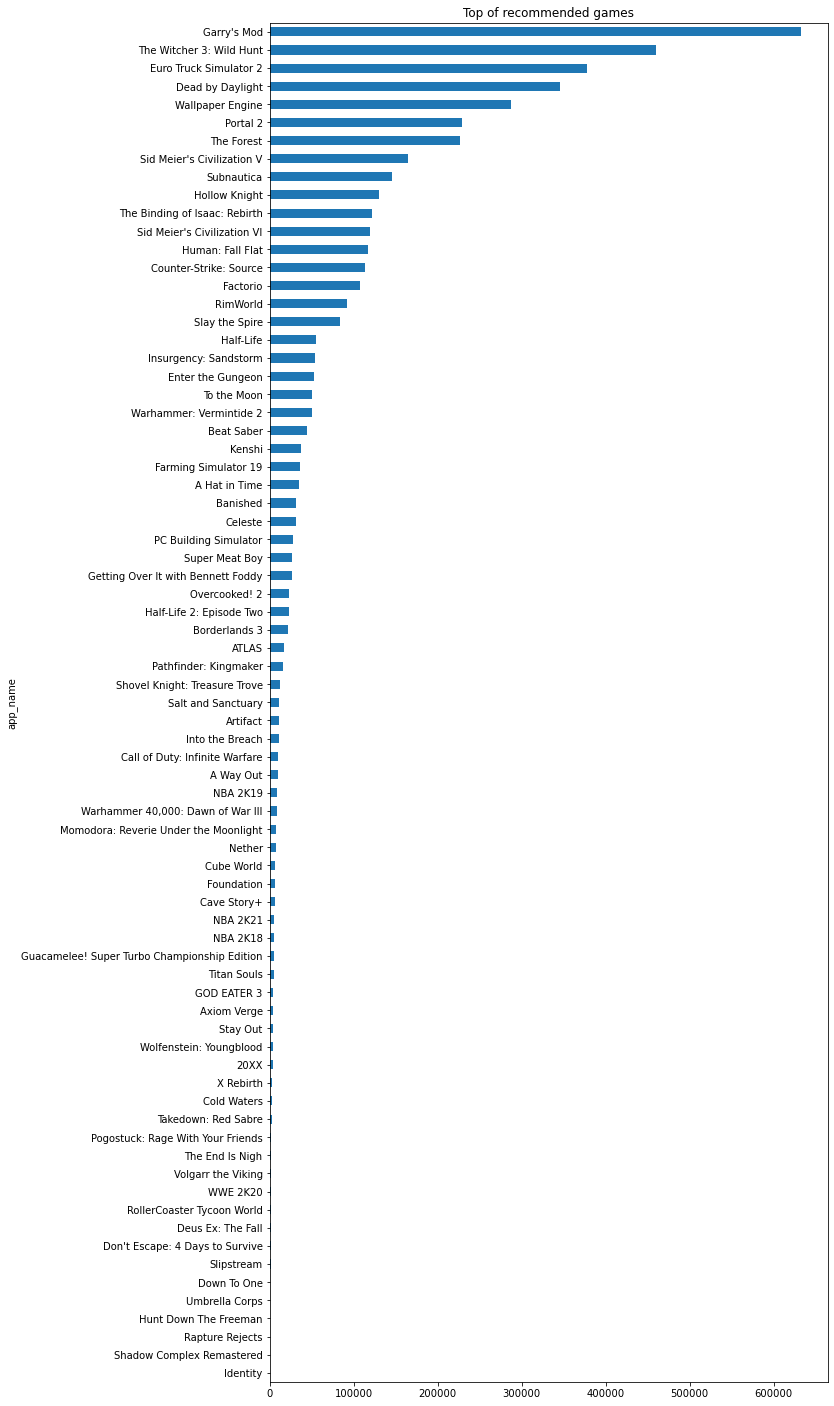

In [161]:
plt.subplots(figsize=(10, 25))
plt.title("Top of recommended games")
df_rec_app.plot.barh()

## Top of languages in which the majority comments

In [162]:
df_languages_mostcom = df.groupby(["language"]).sum()
df_languages_mostcom = df_languages_mostcom.sort_values(["comment_count"],ascending=True)
df_languages_mostcom = df_languages_mostcom["comment_count"]
df_languages_mostcom

language
vietnamese        40.0
greek            137.0
bulgarian        286.0
ukrainian        337.0
norwegian        442.0
danish           649.0
finnish          667.0
romanian         729.0
swedish          739.0
hungarian        905.0
dutch           1030.0
portuguese      1123.0
japanese        1182.0
latam           1330.0
thai            2446.0
czech           2779.0
tchinese        3021.0
italian         4371.0
polish         12704.0
koreana        13434.0
french         15826.0
turkish        17269.0
brazilian      17509.0
spanish        20382.0
german         22763.0
schinese       70432.0
russian       112633.0
english       266880.0
Name: comment_count, dtype: float64

<AxesSubplot:title={'center':'Top of languages in which the majority comments'}, ylabel='language'>

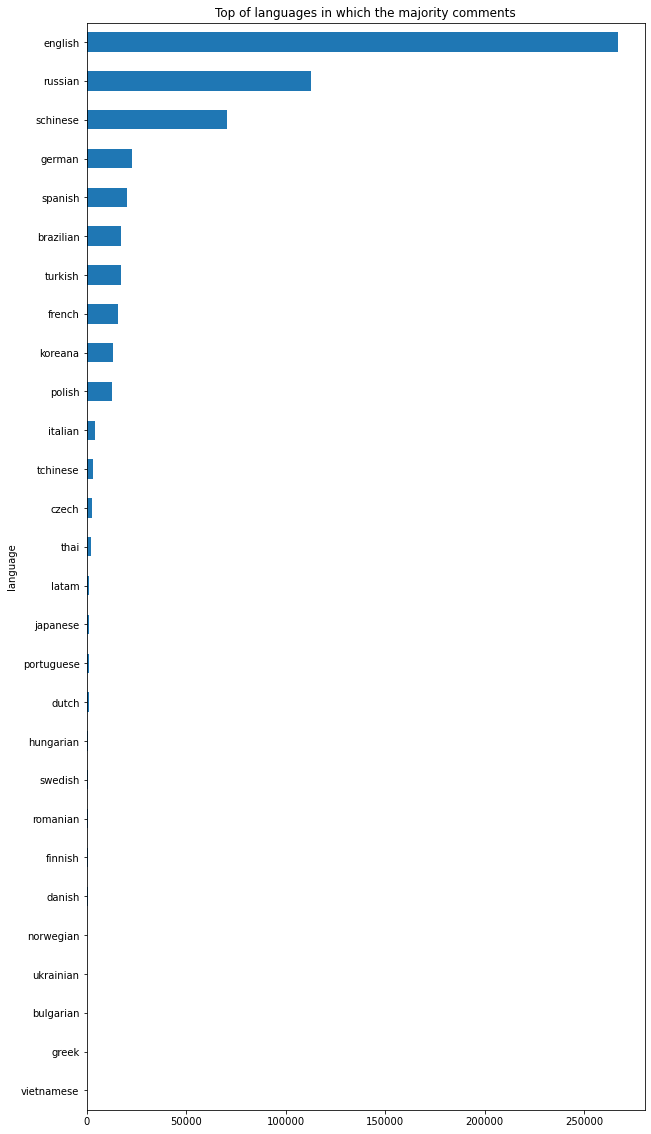

In [163]:
plt.subplots(figsize=(10, 20))
plt.title("Top of languages in which the majority comments")
df_languages_mostcom.plot.barh()

## How much time did the authors spend on games

In [164]:
df_author_playtime = df.groupby(["author.steamid"]).sum()
df_author_playtime = df_author_playtime.sort_values(["author.playtime_forever"],ascending=False)
#convert minutes to days
df_author_playtime  = pd.to_numeric(df_author_playtime["author.playtime_forever"])/3600
df_author_playtime

author.steamid
76561198009032111    1571.861944
76561198393005716    1366.258611
76561198287628621    1007.930556
76561197999384006     983.500833
76561198030806709     964.069167
                        ...     
76561197967232347       0.000000
76561197985750909       0.000000
76561198036762599       0.000000
76561198012406736       0.000000
76561197963579179       0.000000
Name: author.playtime_forever, Length: 4042234, dtype: float64

In [165]:
print(1571.861944/365)

4.306471079452055


In [ ]:
#First author has been using Steam for 4.3 years non-stop :)
#Looking at this data, we see an interesting thing, there is an account with which the author logged into Steam very often 
#and spent a lot of time. We can assume that perhaps some programs were running in the background, such as Wallpaper Engine, 
#and because of this, such a large amount of time, or the author actually used steam every day and played games

## Correlations

<AxesSubplot:>

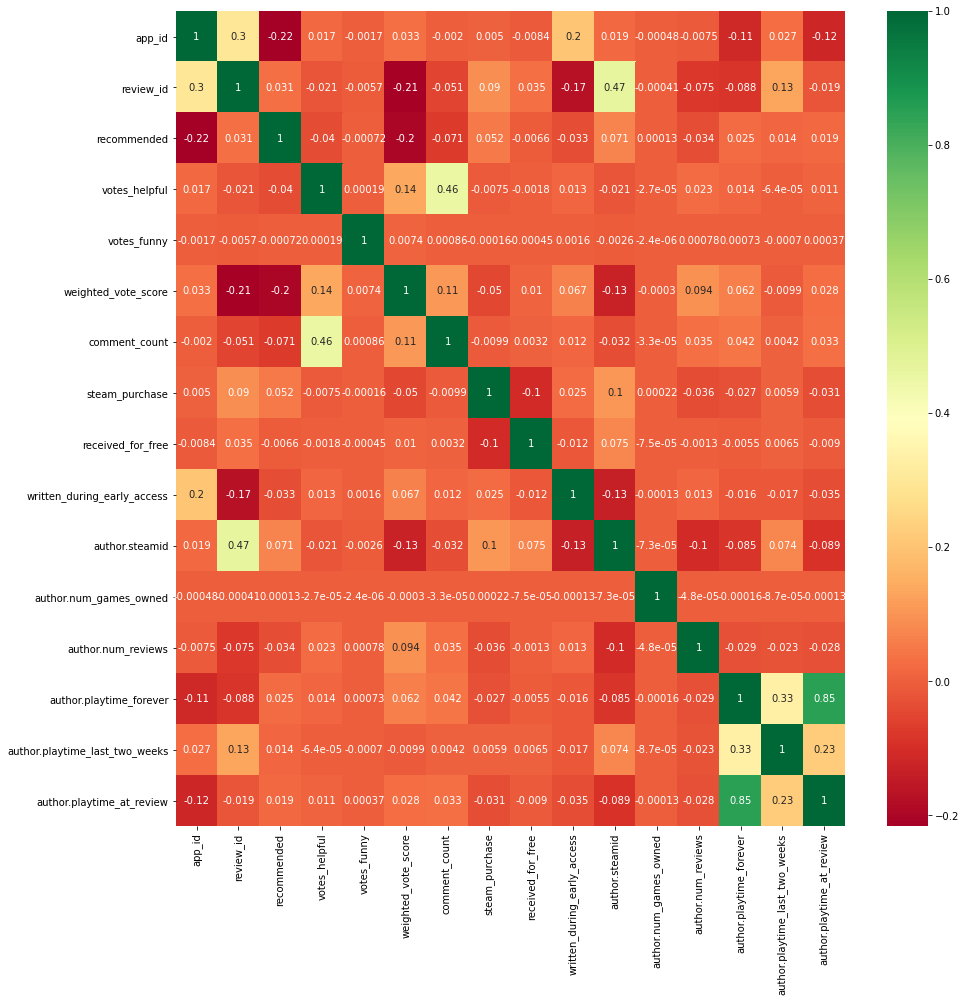

In [166]:
plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn') 

In [ ]:
#only author.playtime_forever and author.playtime_at_review correlated
#cuz of this graph we need identify more specific corr

In [167]:
#I wanted to see how playing hours effect reviews(votes_helpful)
df_author_helpful = df.groupby(["author.steamid"]).sum()
df_author_helpful = df_author_helpful.sort_values(["votes_helpful"],ascending=False)
df_author_helpful  = df_author_helpful[["votes_helpful","author.playtime_forever","author.num_reviews"]].copy()
df_author_helpful

,votes_helpful,author.playtime_forever,author.num_reviews
author.steamid,,,
76561198036586617,11574,100.0,24
76561198347710034,9629,23524.0,4
76561198041425594,9536,14860.0,39
76561197996764341,9132,267287.0,7
76561197970757029,8386,87786.0,33
...,...,...,...
76561198039607802,0,20959.0,1
76561198191687613,0,2781.0,6
76561198191687669,0,7639.0,2


<AxesSubplot:>

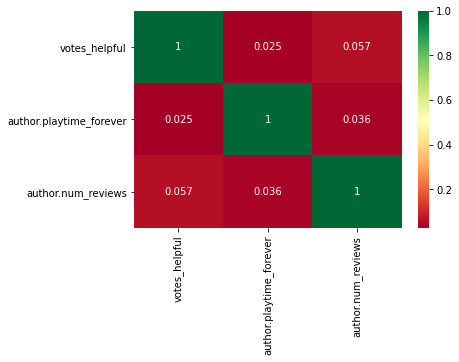

In [168]:
sns.heatmap(df_author_helpful.corr(), annot=True,cmap ='RdYlGn') 

In [ ]:
# as we see on the graph, they are not very much correlated

In [169]:
df_funny = df.groupby(["author.steamid"]).sum()
df_funny =df_funny.sort_values(["votes_helpful"],ascending=False)
df_funny  = df_funny[["votes_helpful","votes_funny"]].copy()
df_funny

,votes_helpful,votes_funny
author.steamid,,
76561198036586617,11574,995
76561198347710034,9629,817
76561198041425594,9536,151
76561197996764341,9132,44
76561197970757029,8386,16
...,...,...
76561198039607802,0,0
76561198191687613,0,0
76561198191687669,0,0


<AxesSubplot:>

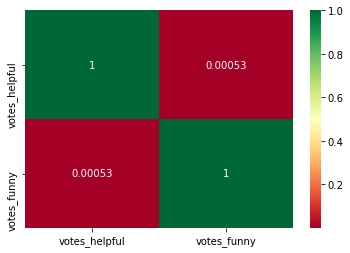

In [170]:
sns.heatmap(df_funny.corr(), annot=True,cmap ='RdYlGn') 

In [ ]:
# helpful reviews are not always funny

In [171]:
df["steam_purchase"] = df["steam_purchase"].astype(int)
df["received_for_free"] = df["received_for_free"].astype(int)

In [172]:
df_free = df.groupby(["author.steamid"]).sum()
df_free = df_free.sort_values(["received_for_free"],ascending=False)
df_free = df_free[["received_for_free","steam_purchase"]].copy()
df_free

,received_for_free,steam_purchase
author.steamid,,
76561198117674830,13,14
76561198304159861,11,4
76561198045381877,10,3
76561198068116100,9,1
76561198020087176,8,2
...,...,...
76561198105675938,0,1
76561198105675951,0,1
76561198105675968,0,1


<AxesSubplot:>

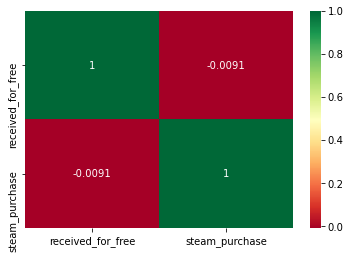

In [173]:
sns.heatmap(df_free.corr(), annot=True,cmap ='RdYlGn') 

In [ ]:
#no one gives anything free

# RQ6

## What is the average time (days and minutes) a user lets pass before he updates a review?

In [3]:
# Firstly,I change str datatype to datetime
df_start=pd.to_datetime(df["timestamp_created"])
df_start 

0        2021-01-23 06:00:29
1        2021-01-23 05:50:30
2        2021-01-23 05:46:40
3        2021-01-23 05:32:50
4        2021-01-23 05:23:47
                 ...        
999995   2020-07-01 15:22:55
999996   2020-07-01 15:22:16
999997   2020-07-01 15:21:39
999998   2020-07-01 15:19:10
999999   2020-07-01 15:18:35
Name: timestamp_created, Length: 1000000, dtype: datetime64[ns]

In [4]:
# Firstly,I change str datatype to datetime
df_updated=pd.to_datetime(df["timestamp_updated"])
df_updated

0        2021-01-23 06:00:29
1        2021-01-23 05:50:30
2        2021-01-23 05:46:40
3        2021-01-23 05:32:50
4        2021-01-23 05:23:47
                 ...        
999995   2020-07-01 15:22:55
999996   2020-07-01 15:22:16
999997   2020-07-01 15:21:39
999998   2020-07-01 15:19:10
999999   2020-07-01 15:18:35
Name: timestamp_updated, Length: 1000000, dtype: datetime64[ns]

In [5]:
#Find time difference between updated and created time
df_diff=df_updated-df_start
df_diff

0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
999995   0 days
999996   0 days
999997   0 days
999998   0 days
999999   0 days
Length: 1000000, dtype: timedelta64[ns]

In [233]:
df_diff = pd.Series(df_diff,name="time_diff")
df_diff.to_frame()
df_copy=df
df_test=pd.concat([df_copy,df_diff],axis=1)
df_test

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,time_diff
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,1,0,0,0.000000,...,0,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03,0 days 00:00:00
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,1,0,0,0.000000,...,0,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27,0 days 00:00:00
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,1,0,0,0.000000,...,0,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17,0 days 00:00:00
3,292030,The Witcher 3: Wild Hunt,85184605,english,2021-01-23 05:32:50,2021-01-23 05:32:50,1,0,0,0.000000,...,0,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44,0 days 00:00:00
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,1,0,0,0.000000,...,0,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,397540,Borderlands 3,74032659,english,2020-08-09 14:44:01,2020-08-09 14:44:01,0,0,0,0.000000,...,0,False,76561198044157960,595,30,82.0,0.0,40.0,2020-08-10 18:56:29,0 days 00:00:00
4999996,397540,Borderlands 3,74032483,schinese,2020-08-09 14:40:21,2020-08-09 14:40:21,1,0,0,0.000000,...,0,False,76561198099115265,8,1,945.0,0.0,874.0,2020-08-10 15:45:17,0 days 00:00:00
4999997,397540,Borderlands 3,74032455,koreana,2020-08-09 14:39:49,2020-08-09 14:39:49,0,0,0,0.476190,...,1,False,76561198120093933,458,11,655.0,0.0,655.0,2020-08-09 08:52:34,0 days 00:00:00
4999998,397540,Borderlands 3,74032432,schinese,2020-08-09 14:39:12,2020-08-09 14:39:12,1,0,0,0.000000,...,1,False,76561198867888968,12,5,1362.0,0.0,1362.0,2020-08-09 14:19:13,0 days 00:00:00


In [234]:
del df_diff
del df_copy

In [235]:
d=df_test[["author.steamid","review_id","time_diff"]].copy()
del df_test

In [236]:
d

,author.steamid,review_id,time_diff
0,76561199095369542,85185598,0 days 00:00:00
1,76561198949504115,85185250,0 days 00:00:00
2,76561199090098988,85185111,0 days 00:00:00
3,76561199054755373,85184605,0 days 00:00:00
4,76561199028326951,85184287,0 days 00:00:00
...,...,...,...
4999995,76561198044157960,74032659,0 days 00:00:00
4999996,76561198099115265,74032483,0 days 00:00:00
4999997,76561198120093933,74032455,0 days 00:00:00
4999998,76561198867888968,74032432,0 days 00:00:00


In [239]:
d.set_index(["author.steamid","review_id"],drop=False,inplace=True)
d

,,author.steamid,review_id,time_diff
author.steamid,review_id,,,
76561199095369542,85185598,76561199095369542,85185598,0 days 00:00:00
76561198949504115,85185250,76561198949504115,85185250,0 days 00:00:00
76561199090098988,85185111,76561199090098988,85185111,0 days 00:00:00
76561199054755373,85184605,76561199054755373,85184605,0 days 00:00:00
76561199028326951,85184287,76561199028326951,85184287,0 days 00:00:00
...,...,...,...,...
76561198044157960,74032659,76561198044157960,74032659,0 days 00:00:00
76561198099115265,74032483,76561198099115265,74032483,0 days 00:00:00
76561198120093933,74032455,76561198120093933,74032455,0 days 00:00:00


In [238]:
d.index()

TypeError: 'MultiIndex' object is not callable

In [210]:
dd.first()

,,time_diff
author.steamid,review_id,
76561197960265730,27031450,0 days
76561197960265747,33709030,0 days
76561197960265781,59242845,0 days
76561197960265822,40972738,0 days
76561197960265890,43,0 days
...,...,...
76561199132836705,85198783,0 days
76561199132868139,85208796,0 days
76561199132972128,85198070,0 days


In [6]:
#longest updated review
print(df_diff.max())

3672 days 01:32:51


In [93]:
print(type(df_diff.mean()))

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [94]:
df_diff.mean().isoformat()

'P39DT16H45M8.106731201S'

In [95]:
#To find the Average Updated(Days+Minutes),I use seconds_info and change this into days and minutes
seconds=df_diff.mean().total_seconds()
seconds

3429908.106731

In [96]:
minutes=seconds/60
minutes

57165.13511218333

In [97]:
days=math.floor(minutes/1440)
days

39

In [98]:
day_minutes=minutes%1440
day_minutes

1005.1351121833286

In [99]:
print("Days:",days,"Minutes:",day_minutes)

Days: 39 Minutes: 1005.1351121833286


## Plot the top 3 authors that usually update their reviews.

In [125]:
df["comment_count"].max()

667

In [129]:
df["comment_count"].nlargest(n=5)

2439723    667
1979179    637
1436216    434
552265     420
1948655    416
Name: comment_count, dtype: int64

In [114]:
df_copy=df

In [129]:
type(df_diff)

pandas.core.series.Series

In [130]:
df_diff = pd.Series(df_diff,name="time_diff")

In [131]:
df_diff = pd.Series(df_diff,name="time_diff")
df_diff.to_frame()

,time_diff
0,0 days 00:00:00
1,0 days 00:00:00
2,0 days 00:00:00
3,0 days 00:00:00
4,0 days 00:00:00
...,...
4999995,0 days 00:00:00
4999996,0 days 00:00:00
4999997,0 days 00:00:00
4999998,0 days 00:00:00


In [147]:
df_top3=pd.concat([df_copy,df_diff],axis=1)
df_top3

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,time_diff
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,1,0,0,0.000000,...,0,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03,0 days 00:00:00
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,1,0,0,0.000000,...,0,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27,0 days 00:00:00
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,1,0,0,0.000000,...,0,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17,0 days 00:00:00
3,292030,The Witcher 3: Wild Hunt,85184605,english,2021-01-23 05:32:50,2021-01-23 05:32:50,1,0,0,0.000000,...,0,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44,0 days 00:00:00
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,1,0,0,0.000000,...,0,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,397540,Borderlands 3,74032659,english,2020-08-09 14:44:01,2020-08-09 14:44:01,0,0,0,0.000000,...,0,False,76561198044157960,595,30,82.0,0.0,40.0,2020-08-10 18:56:29,0 days 00:00:00
4999996,397540,Borderlands 3,74032483,schinese,2020-08-09 14:40:21,2020-08-09 14:40:21,1,0,0,0.000000,...,0,False,76561198099115265,8,1,945.0,0.0,874.0,2020-08-10 15:45:17,0 days 00:00:00
4999997,397540,Borderlands 3,74032455,koreana,2020-08-09 14:39:49,2020-08-09 14:39:49,0,0,0,0.476190,...,1,False,76561198120093933,458,11,655.0,0.0,655.0,2020-08-09 08:52:34,0 days 00:00:00
4999998,397540,Borderlands 3,74032432,schinese,2020-08-09 14:39:12,2020-08-09 14:39:12,1,0,0,0.000000,...,1,False,76561198867888968,12,5,1362.0,0.0,1362.0,2020-08-09 14:19:13,0 days 00:00:00


In [148]:
df_top3 = df_top3.groupby(["comment_count","time_diff"])
df_top3.first()

app_id                  app_name  review_id  \
comment_count time_diff                                                        
0             0 days 00:00:00    292030  The Witcher 3: Wild Hunt   85185598   
              0 days 00:00:01    292030  The Witcher 3: Wild Hunt   33276197   
              0 days 00:00:02    292030  The Witcher 3: Wild Hunt   33142562   
              0 days 00:00:03       240    Counter-Strike: Source   32870771   
              0 days 00:00:04    292030  The Witcher 3: Wild Hunt   32873502   
...                                 ...                       ...        ...   
416           480 days 21:18:26  381210          Dead by Daylight   54063888   
420           152 days 11:18:46     240    Counter-Strike: Source   60380473   
434           0 days 00:00:00      4000               Garry's Mod   16695663   
637           551 days 11:46:54  381210          Dead by Daylight   50010036   
667           0 days 00:00:00    264710                Subnautica   21849145   

                                 language    timestamp_created  \
comment_count time_diff                                          
0             0 days 00:00:00    schinese  2021-01-23 06:00:29   
              0 days 00:00:01     turkish  2017-07-05 14:02:16   
              0 days 00:00:02     english  2017-07-02 17:38:42   
              0 days 00:00:03     english  2017-06-27 18:01:25   
              0 days 00:00:04     turkish  2017-06-27 18:23:25   
...                                   ...                  ...   
416           480 days 21:18:26   english  2019-07-13 00:56:09   
420           152 days 11:18:46   english  2019-12-23 11:26:43   
434           0 days 00:00:00     english  2015-06-25 11:01:18   
637           551 days 11:46:54   turkish  2019-04-07 11:22:18   
667           0 days 00:00:00    schinese  2016-03-15 09:13:35   

                                   timestamp_updated  recommended  \
comment_count time_diff                                             
0             0 days 00:00:00    2021-01-23 06:00:29            1   
              0 days 00:00:01    2017-07-05 14:02:17            1   
              0 days 00:00:02    2017-07-02 17:38:44            1   
              0 days 00:00:03    2017-06-27 18:01:28            1   
              0 days 00:00:04    2017-06-27 18:23:29            1   
...                                              ...          ...   
416           480 days 21:18:26  2020-11-04 22:14:35            0   
420           152 days 11:18:46  2020-05-23 22:45:29            1   
434           0 days 00:00:00    2015-06-25 11:01:18            1   
637           551 days 11:46:54  2020-10-09 23:09:12            1   
667           0 days 00:00:00    2016-03-15 09:13:35            1   

                                 votes_helpful  votes_funny  \
comment_count time_diff                                       
0             0 days 00:00:00                0            0   
              0 days 00:00:01                1            0   
              0 days 00:00:02                2            0   
              0 days 00:00:03                0            0   
              0 days 00:00:04                3            0   
...                                        ...          ...   
416           480 days 21:18:26            214           54   
420           152 days 11:18:46              4            0   
434           0 days 00:00:00             2162         8379   
637           551 days 11:46:54             70            1   
667           0 days 00:00:00             1426         2897   

                                 weighted_vote_score  steam_purchase  \
comment_count time_diff                                                
0             0 days 00:00:00               0.000000               1   
              0 days 00:00:01               0.478261               1   
              0 days 00:00:02               0.543466               0   
              0 days 00:00:03               0.000000   

In [146]:
df_top3.last()

app_id                app_name  review_id  \
comment_count time_diff                                                      
0             0 days 00:00:00    397540           Borderlands 3   74032432   
              0 days 00:00:01    233860                  Kenshi   31961252   
              0 days 00:00:02    431960        Wallpaper Engine   32806962   
              0 days 00:00:03    431960        Wallpaper Engine   32871809   
              0 days 00:00:04    227300  Euro Truck Simulator 2   32874131   
...                                 ...                     ...        ...   
416           480 days 21:18:26  381210        Dead by Daylight   54063888   
420           152 days 11:18:46     240  Counter-Strike: Source   60380473   
434           0 days 00:00:00      4000             Garry's Mod   16695663   
637           551 days 11:46:54  381210        Dead by Daylight   50010036   
667           0 days 00:00:00    264710              Subnautica   21849145   

                                 language    timestamp_created  \
comment_count time_diff                                          
0             0 days 00:00:00    schinese  2020-08-09 14:39:12   
              0 days 00:00:01     english  2017-05-25 22:49:54   
              0 days 00:00:02     english  2017-06-26 09:09:38   
              0 days 00:00:03     english  2017-06-27 18:09:28   
              0 days 00:00:04     turkish  2017-06-27 18:28:52   
...                                   ...                  ...   
416           480 days 21:18:26   english  2019-07-13 00:56:09   
420           152 days 11:18:46   english  2019-12-23 11:26:43   
434           0 days 00:00:00     english  2015-06-25 11:01:18   
637           551 days 11:46:54   turkish  2019-04-07 11:22:18   
667           0 days 00:00:00    schinese  2016-03-15 09:13:35   

                                   timestamp_updated  recommended  \
comment_count time_diff                                             
0             0 days 00:00:00    2020-08-09 14:39:12            1   
              0 days 00:00:01    2017-05-25 22:49:55            1   
              0 days 00:00:02    2017-06-26 09:09:40            1   
              0 days 00:00:03    2017-06-27 18:09:31            1   
              0 days 00:00:04    2017-06-27 18:28:56            1   
...                                              ...          ...   
416           480 days 21:18:26  2020-11-04 22:14:35            0   
420           152 days 11:18:46  2020-05-23 22:45:29            1   
434           0 days 00:00:00    2015-06-25 11:01:18            1   
637           551 days 11:46:54  2020-10-09 23:09:12            1   
667           0 days 00:00:00    2016-03-15 09:13:35            1   

                                 votes_helpful  votes_funny  \
comment_count time_diff                                       
0             0 days 00:00:00                0            0   
              0 days 00:00:01                0            0   
              0 days 00:00:02                0            0   
              0 days 00:00:03                1            0   
              0 days 00:00:04                0            0   
...                                        ...          ...   
416           480 days 21:18:26            214           54   
420           152 days 11:18:46              4            0   
434           0 days 00:00:00             2162         8379   
637           551 days 11:46:54             70            1   
667           0 days 00:00:00             1426         2897   

                                 weighted_vote_score  steam_purchase  \
comment_count time_diff                                                
0             0 days 00:00:00               0.000000               0   
              0 days 00:00:01               0.482456               1   
              0 days 00:00:02               0.000000               0   
              0 days 00:00:03               0.502488               1   
         